<a href="https://colab.research.google.com/github/karlhongjones/barlbong/blob/main/Coding_Exercise_ML_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas scikit-learn matplotlib


In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Sample dataset
data = {
    'square_footage': [1500, 1800, 2400, 3000, 3500],
    'location': ['Downtown', 'Suburb', 'Suburb', 'Downtown', 'Rural'],
    'price': [400000, 450000, 600000, 650000, 350000]
}
df = pd.DataFrame(data)

# Features and target
X = df[['square_footage', 'location']]
y = df['price']

# Preprocess
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), ['location'])
], remainder='passthrough')

# Model
model = Pipeline([
    ('pre', preprocessor),
    ('reg', LinearRegression())
])
model.fit(X, y)

# Predict for 2000 sq ft house in Downtown
new_house = pd.DataFrame({'square_footage': [2000], 'location': ['Downtown']})
pred = model.predict(new_house)
print("Predicted Price:", pred[0])

# Coefficients
print("Model Coefficients:", model.named_steps['reg'].coef_)


Predicted Price: 480459.7701149279
Model Coefficients: [ 1.23659004e+05 -2.74042146e+05  1.50383142e+05  1.78160920e+02]


In [3]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Sample dataset
data = {
    'age': [25, 45, 52, 36, 40],
    'monthly_usage': [300, 100, 50, 250, 120],
    'purchase_amount': [100, 50, 20, 80, 40],
    'customer_service_calls': [1, 4, 5, 2, 3],
    'region': ['North', 'South', 'East', 'West', 'South'],
    'churn': [0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

X = df.drop('churn', axis=1)
y = df['churn']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['age','monthly_usage','purchase_amount','customer_service_calls']),
    ('cat', OneHotEncoder(), ['region'])
])

# Model
model = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression())
])
model.fit(X, y)

# Predict churn probability for a new customer
new_customer = pd.DataFrame({
    'age': [30], 'monthly_usage': [200], 'purchase_amount': [70],
    'customer_service_calls': [2], 'region': ['North']
})
prob = model.predict_proba(new_customer)[0][1]
print("Churn Probability:", prob)
print("At risk:", prob > 0.5)


Churn Probability: 0.34096938905617824
At risk: False


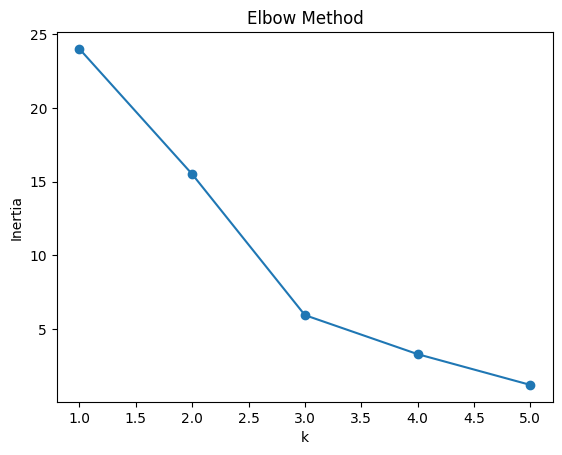

         annual_spending  purchase_frequency        age
cluster                                                
0                 5000.0           40.000000  36.000000
1                 1150.0           10.000000  55.000000
2                 1400.0           12.666667  31.666667


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sample dataset
data = {
    'annual_spending': [1000, 2000, 3000, 1500, 5000, 7000, 800, 1200],
    'purchase_frequency': [10, 20, 30, 15, 40, 50, 5, 8],
    'age': [25, 40, 35, 50, 28, 45, 60, 30],
    'region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West']
}
df = pd.DataFrame(data)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['annual_spending', 'purchase_frequency', 'age']])

# Elbow method
inertias = []
for k in range(1,6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,6), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Cluster with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
print(df.groupby('cluster').mean(numeric_only=True))
